# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [119]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
#!ls

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

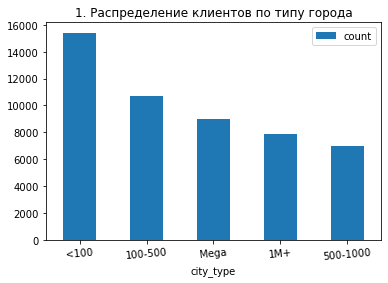

In [7]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df_city = df.groupby('city_type').size().reset_index(name='count').sort_values(by='count', ascending=False).head()
df_city.plot(x="city_type", y="count", kind="bar", rot=5, fontsize=10)

plt.title('1. Распределение клиентов по типу города');

In [54]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
age_min = df['age'].min()
age_max = df['age'].max()

#df.groupby(s).aggregate(['min', 'max'])

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
age_min = df['age'].min()
age_max = df['age'].max()


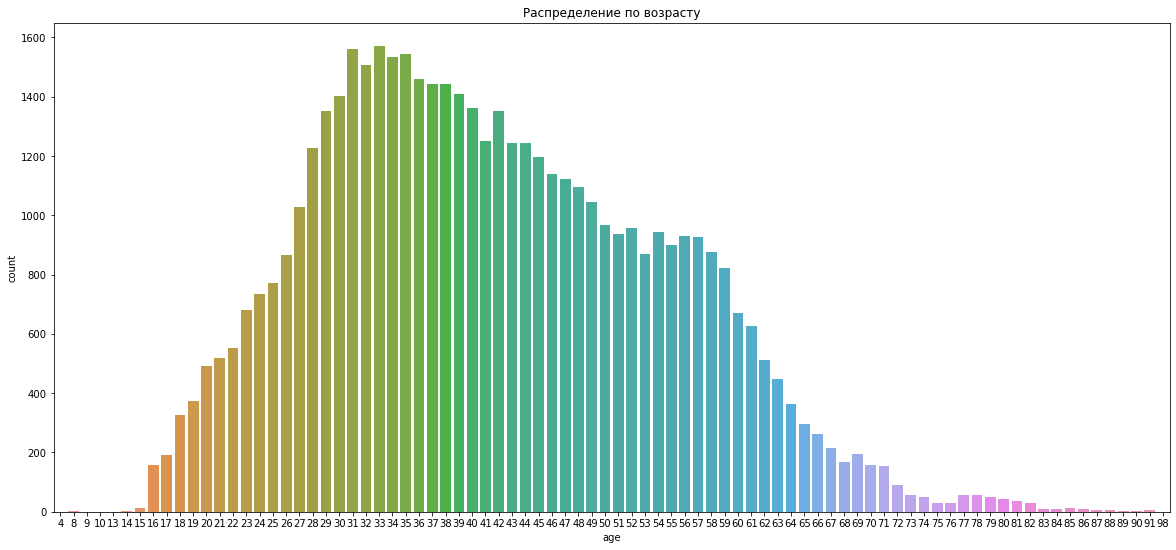

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 20,9
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
sns.countplot(x='age', data=df);
plt.title('Распределение клиентов по возрасту');

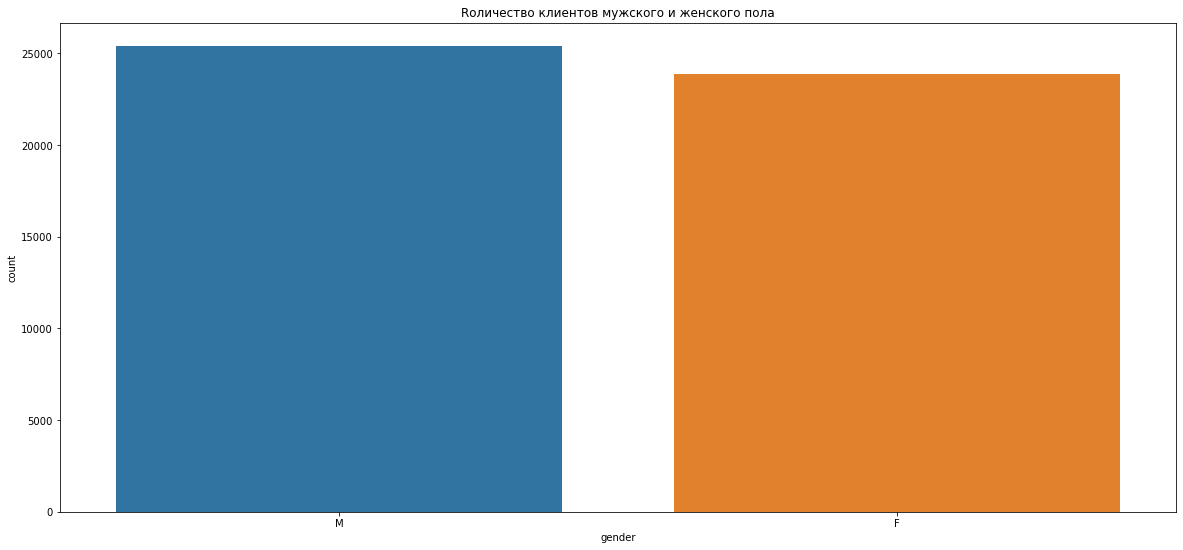

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
sns.countplot(x='gender', data=df);
plt.title('Количество клиентов мужского и женского пола');

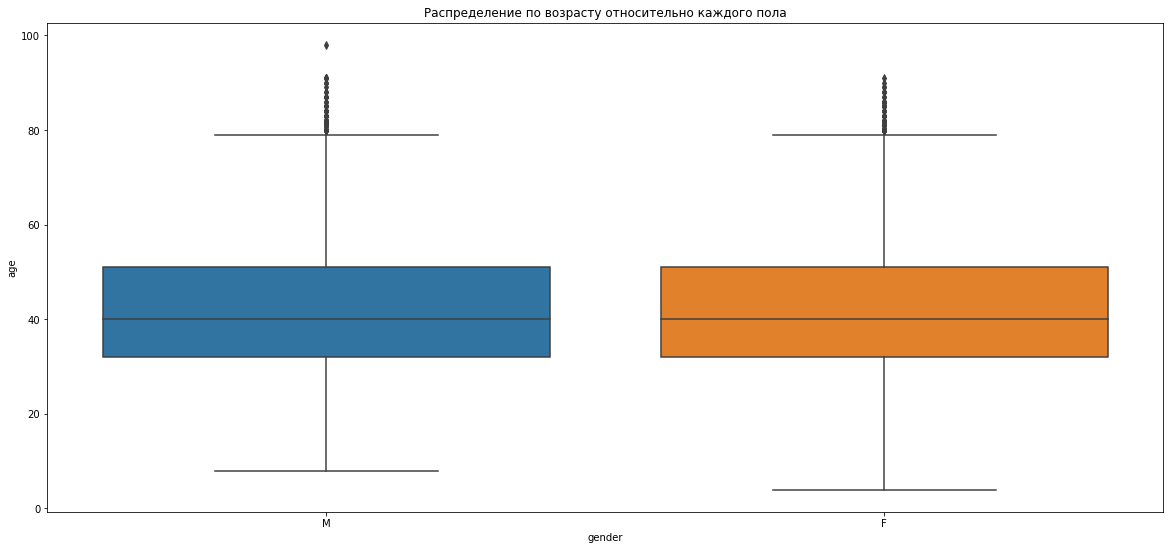

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')

sns.boxplot(x='gender', y='age', data=df)
plt.title('Распределение по возрасту относительно каждого пола');


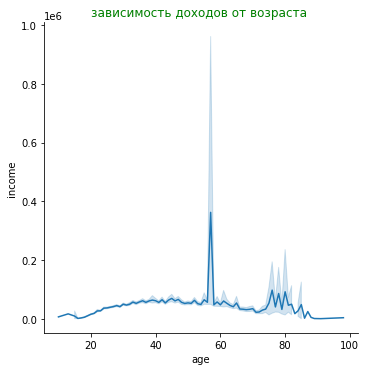

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df_ml_balance_series = df.set_index('age')['ml_balance']
df_ml_balance_series.head()
sns.relplot(
    x='age',
    y='income',
    data=df.query("income > 0"),
    #kind='scatter'
     kind='line'
)
plt.title('зависимость доходов от возраста ', color='g');


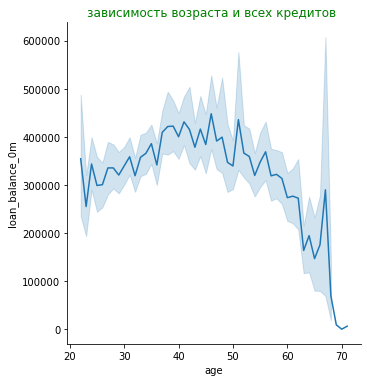

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')

df_ipiteka = df[['age', 'loan_balance_0m']]
count_ipoteka = df_ipiteka.query('loan_balance_0m > 0')
sns.relplot(
    x='age',
    y='loan_balance_0m',
    data=count_ipoteka ,
    #kind='scatter'
     kind='line'
)
plt.title('зависимость возраста и всех кредитов ', color='g');
#df_ipiteka
#count_ipoteka
#df[['age', 'ml_balance', 'cl_balance_0m','loan_balance_0m']]
#count_ipoteka = df.query('ml_balance > 0').count()
#count_kredit = df.query('cl_balance_0m > 0').count()
#count_all_kredit = df.query('loan_balance_0m > 0').count()
#count_all_kredit

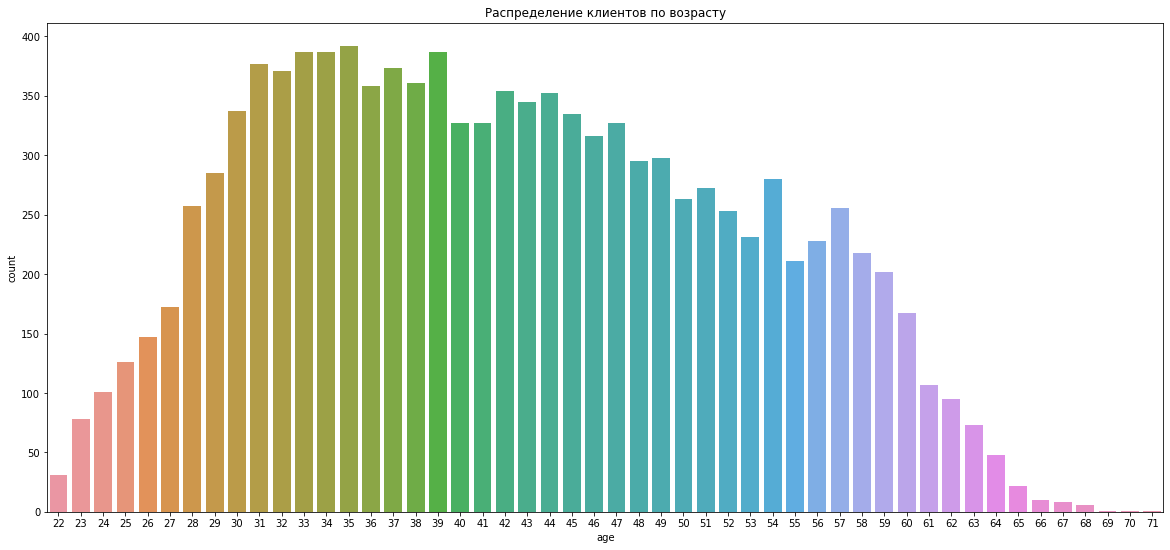

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 20,9
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df_ipiteka = df[['age', 'loan_balance_0m']]
count_ipoteka = df_ipiteka.query('loan_balance_0m > 0')
sns.countplot(x='age', data=count_ipoteka);
plt.title('Распределение клиентов по возрасту и суммам всех кредитов');